# Notebook de nettoyage - Adrian Rodriguez - Projet 2 parcours Ingénieur Machine Learning

---
# 0. Contexte

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Je souhaite proposer une idée d’application.

Les changements de modes de vie s'accompagnent d'une réduction du temps de préparation des repas à domicile (- 25 % entre 1986 et 2010) et profitent à des produits faciles d'emploi, tels que les pizzas ou les desserts lactés frais.

Chacun des produits dispose d'une étiquette nutritionnelle. Cette étiquette informe le consommateur final des points suivants :
- des valeurs du contenu en énergie (kj/kcal) et en nutriments (valeurs en gramme ou miligramme pour 100g de produit),
- de la liste des ingrédients.

Hélène Baribeau, nutritioniste, dit qu'un aliment est considéré comme riche en calories quand il dépasse 300 calories pour 100 g

Les calories traduisent la valeur énergétique d’un aliment, qui peut aussi être exprimée en kilojoules (kJ). Les besoins quotidiens en calories varient selon le sexe, l'âge, la corpulence, la dépense physique et l'état de santé.

| Age, activité   | Homme | Femme |
|:----------|:-------:|:------:|
| Enfant de 1 à 3 ans | 1360 kcal | 1360 kcal |
| Adolescents de 13 à 15 ans | 2890 kcal | 2480 kcal |
| Adulte avec activité faible | 2100 kcal | 1800 kcal |
| Adulte avec activité moyenne | 2700 kcal | 2000 kcal |
| Adulte avec activité intense | 3000 kcal | 2200 kcal |

Si on absorbe plus d’énergie que nécessaire et que toutes les réserves sont saturées (notamment pour les glycogènes), le corps va le stocker sous forme de graisse. Un excès de graisse peut entrainer des problèmes de santé.

Les problèmes de maladies cardiovasculaires et de diabètes sont présents au quotidien pour des millions de français. L'alimentation saine est un des enjeux majeurs de la société d'aujourd'hui. J'envisage de développer une application permettant d'accompagner le consommateur final dans ses choix de produits alimentaires, en fonction de ses caractéristiques personnelles.

Il s'agira de répondre à la question suivante : 
- Est-ce qu’il est possible de définir des catégories de produits en fonction leur apport en énergie ?

Mon rôle sera de d'étudier la faisabité d'une telle application à partir des données présentes sur Open Food Fact. En savoir plus https://fr.openfoodfacts.org/decouvrir

---
# 1. Importation et vérification du dataset

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from functions import *

from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats as st

In [2]:
reduced_food_raw = pd.read_csv('src/reduced_food.csv')

In [3]:
reduced_food_raw.shape

(45200, 10)

In [4]:
reduced_food_raw.head()

,code,product_name,category,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
0,0000000274722,Blanquette de Volaille et son Riz,Epicerie - Plats préparés,108.0,2.200000,0.9,15.3,0.5,0.5,6.8
1,0000000274739,Raviolini au Fromage de chèvre et Pesto,Epicerie - Plats préparés,109.0,4.200000,2.1,12.5,1.4,1.8,4.4
2,0000000491228,Entremets Crème Brulée,Produits laitiers,467.0,15.300000,11.2,75.5,69.8,0.1,6.8
3,0000005016,Pesto à la roquette bio,Epicerie - Plats préparés,554.0,53.200001,9.6,11.7,0.5,1.3,8.2
4,0000005018,Crème d'artichaut bio,A trier,264.0,27.400000,3.9,1.8,0.0,3.5,1.9


In [5]:
reduced_food_raw.dtypes

code                   object
product_name           object
category               object
energy-kcal_100g      float64
fat_100g              float64
saturated-fat_100g    float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
proteins_100g         float64
dtype: object

In [6]:
reduced_food_raw.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
count,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000,45200.000000
mean,289.676947,15.658735,6.249840,27.780527,13.830936,1.239768,8.794752
std,175.245273,17.207266,8.182863,27.355305,19.824967,2.236837,7.666573
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.000000,2.900000,0.700000,3.100000,0.800000,0.000000,3.300000
50%,267.000000,10.000000,2.900000,16.000000,3.500000,0.000000,6.800000
75%,410.000000,24.000000,9.200000,53.000000,21.000000,1.900000,12.000000
max,900.000000,100.000000,100.000000,100.000000,100.000000,85.000000,100.000000


In [7]:
reduced_food = reduced_food_raw

---
# 2. Recherche des corrélations
Je cherche à savoir si il y existe des liens entre la valeur énergétique d'un produit et ses différents facteurs énergétiques. Et si oui, quelle est la force de ces liens.

In [8]:
plt.style.use("default")

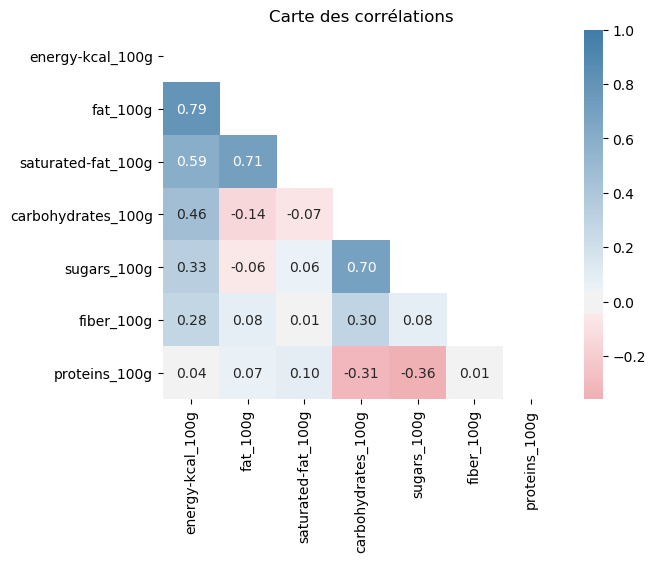

In [9]:
# Carte des corrélations des facteurs énergétiques
corr = reduced_food.corr()

fig, ax = plt.subplots()
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, cmap=cmap, linewidths=0, annot=True, fmt=".2f")
plt.title('Carte des corrélations')

fig.savefig('img_corr_map.png', dpi=500, quality=95, transparent=True, bbox_inches = "tight")

La carte des corrélations ci-dessus me montre que les lipides apporte le plus de valeur énergétique. Vient ensuite les gras saturés, les glucides, les sucres. La carte me montre également un fort lien entre les lipides et les gras saturés, puis les glucides et les sucres. Après quelques recherches, cela est normal car les gras saturés font partie de la famille des lipides et les sucres font partie de la famille des glucides.

Je vais confirmer cela en les représentant visuellement.

In [10]:
scaler = StandardScaler()
std_reduced_food = reduced_food.select_dtypes(include=['float64'])
std_reduced_food = pd.DataFrame(scaler.fit_transform(std_reduced_food), columns = std_reduced_food.columns)

n_comp = 6 # Nbr max de variable.
pca = PCA(n_components=n_comp)
pca.fit(std_reduced_food)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

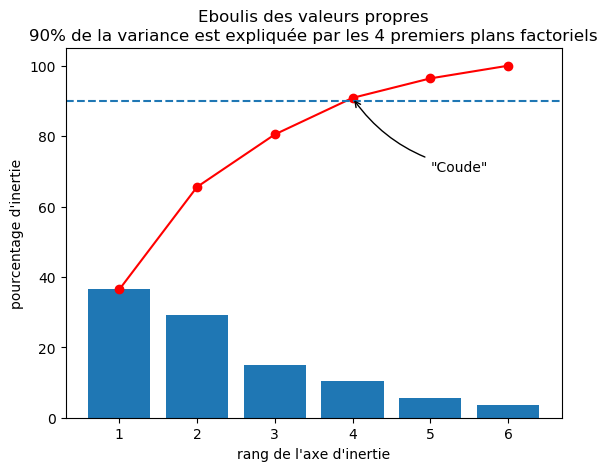

In [11]:
# Eboulis des valeurs propres
fig, ax = plt.subplots()

var = pca.explained_variance_ratio_*100
ax.bar(np.arange(len(var))+1, var)
ax.plot(np.arange(len(var))+1, var.cumsum(),c="red",marker='o')
ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("pourcentage d'inertie")
ax.set_title("Eboulis des valeurs propres\n90% de la variance est expliquée par les 4 premiers plans factoriels")
ax.annotate('"Coude"', xy=(4, (pca.explained_variance_ratio_.cumsum() * 100)[3]), xytext=(5, 70),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-.2'))
ax.axhline(y=90, linestyle='--')
plt.show(block=False)

In [12]:
print(100*pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum() * 100)

[36.42877106 29.12724964 14.91457301 10.38358949  5.53812592  3.6029379 ]
[36.42877106 65.5560207  80.47059372 90.85418321 96.39230913 99.99524702]


J'atteint 90 % de la variance avec les 4 premières composantes. C'est aussi la que se forme un "coude". La suite de l'étude se portera sur la 4 premières composantes.

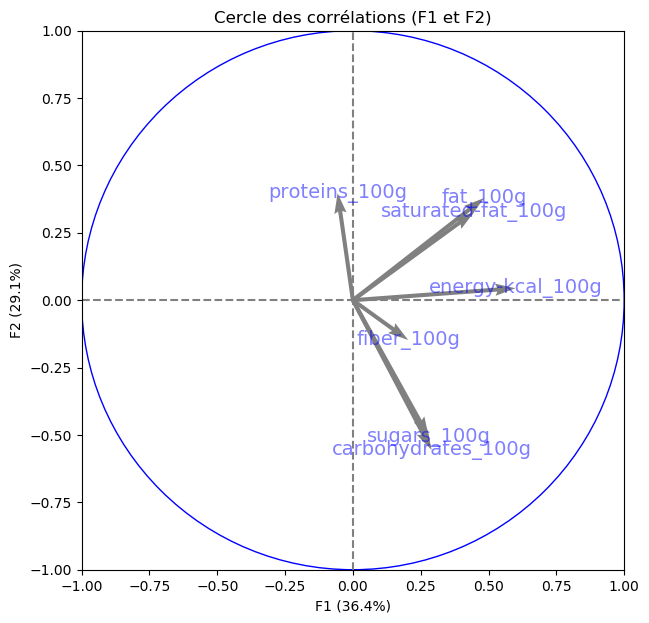

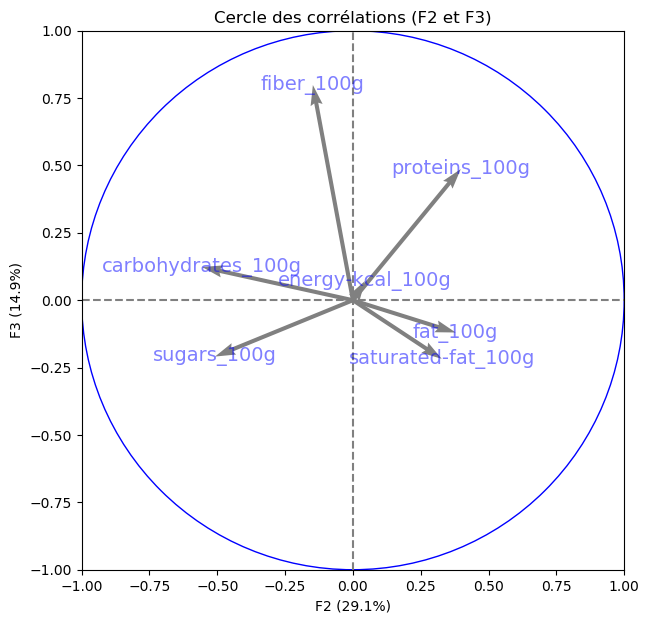

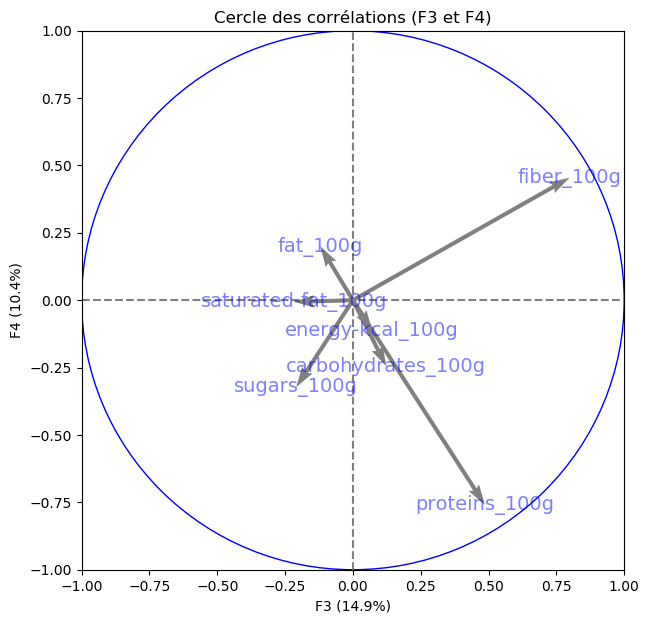

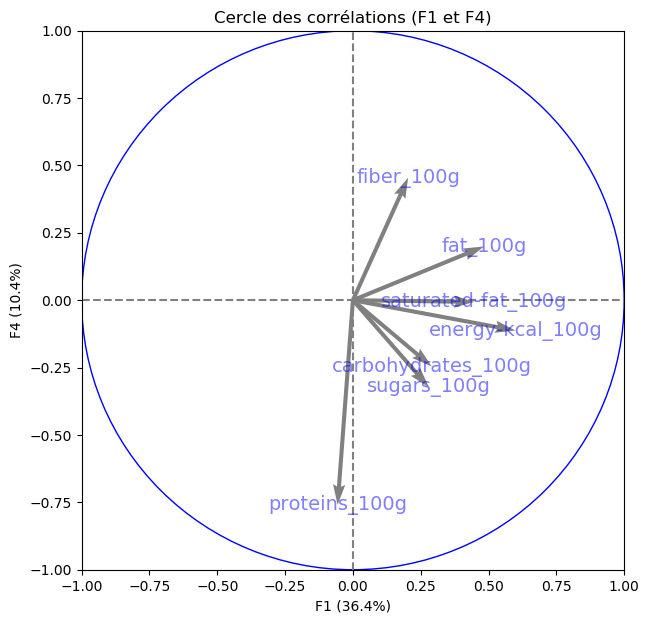

In [13]:
# Cercle des corrélations
features = std_reduced_food.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(1,2),(2,3),(0,3)], labels = np.array(features))

---
# 3. Comparaison d'une classification non supervisée à la catégorisation manuelle
Le jeu de données possède 45,200 observations. En procédant à un clustering hiérarchique, le temps d'éxecution sera très long. Le kmeans est plus adapté sur ce jeu de données. L'algorithme se base sur les facteurs nutritionnels influent la valeur énergétique

L'objectif de cette classification sera de la comparer avec la catégorisation manuelle faite lors du nettoyage

## 3-1. Clustering kmeans


Ma valeur cible est la valeur énergétique. Je ne dois prendre en compte que les facteurs énergétiques dans mon clustering

In [14]:
fact = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g']

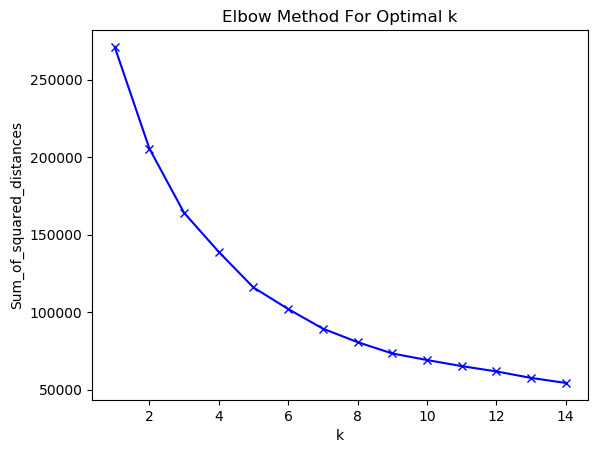

In [15]:
# Définition du nombre de clusters
# source : https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(std_reduced_food[fact])
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Il n'y a pas de cassure franche (coude bien visible). Je retiens 5 clusters car c'est la qu'est la "cassure" la plus significative

In [16]:
# Exécution du kmeans
km = KMeans(n_clusters=5)
km.fit(std_reduced_food[fact])

reduced_food['cluster_labels'] = km.labels_
reduced_food['cluster_labels'] = reduced_food['cluster_labels'].astype(str)

cluster_labels
0    18477
1     2472
2     5751
3     9722
4     8778
Name: code, dtype: int64

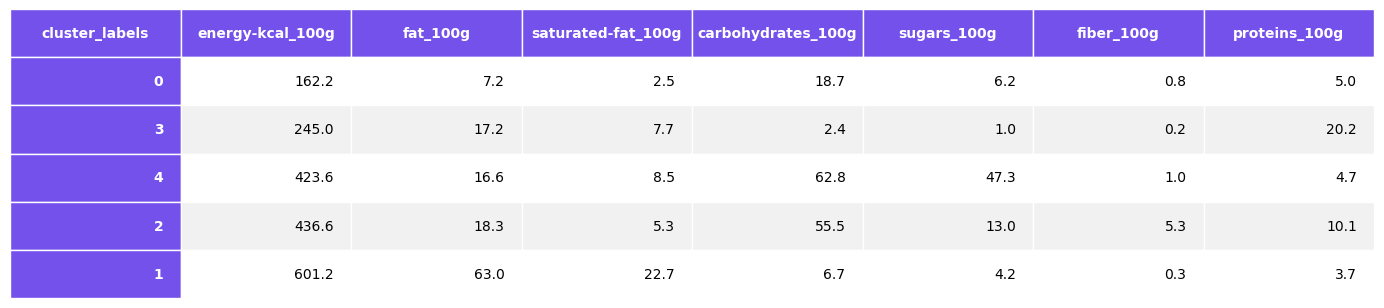

In [17]:
# Centroîdes
display(reduced_food.groupby('cluster_labels')['code'].count())

centroids = reduced_food.groupby('cluster_labels').mean().sort_values(by='energy-kcal_100g').round(1).reset_index()
export_png_table(centroids, filename='img_centroids.png')

Nous pouvons noter que la valeur énergétique augmente proportionnellement en fonction des lipides. Chaque clusters à sa tendance en fonction d'une famille nutritionnelle. Cette constatation est conforme à la carte des corrélations.

## 3-2. Projection sur les plans factoriels
Je projette sur les plans factoriels les individus classés par groupe, définis par l'algorithme Kmeans et par la catégorisation manuelle. Ceci dans le but d'identifier des similitudes.

In [18]:
X_projected = pca.transform(std_reduced_food)

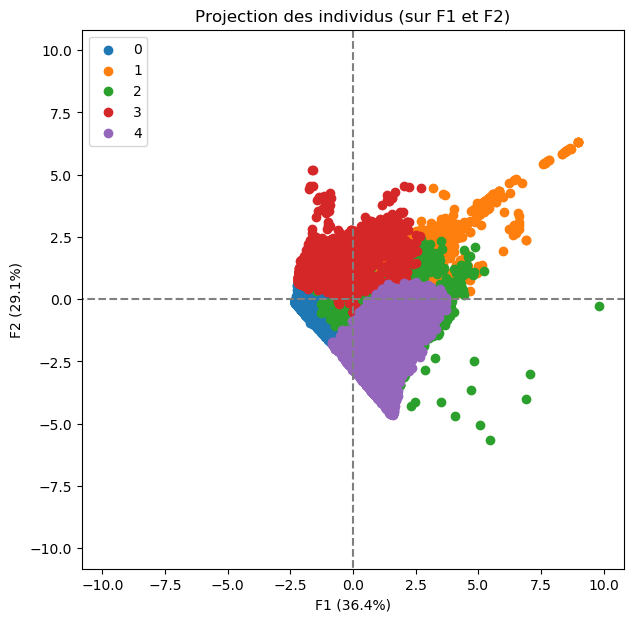

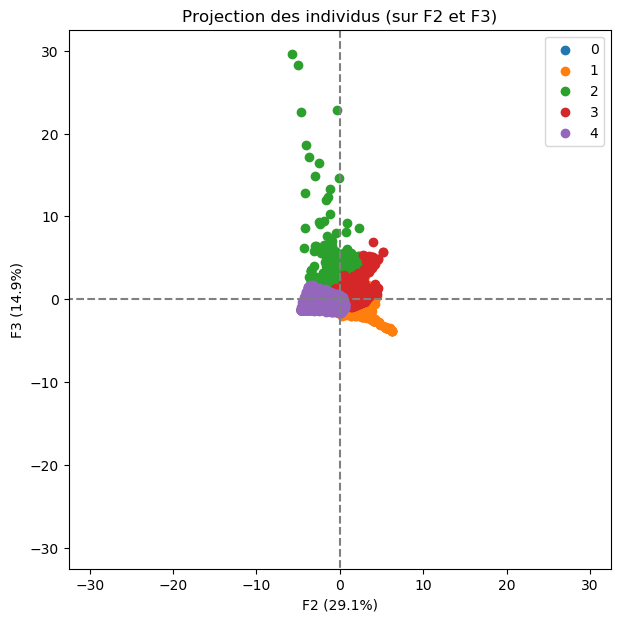

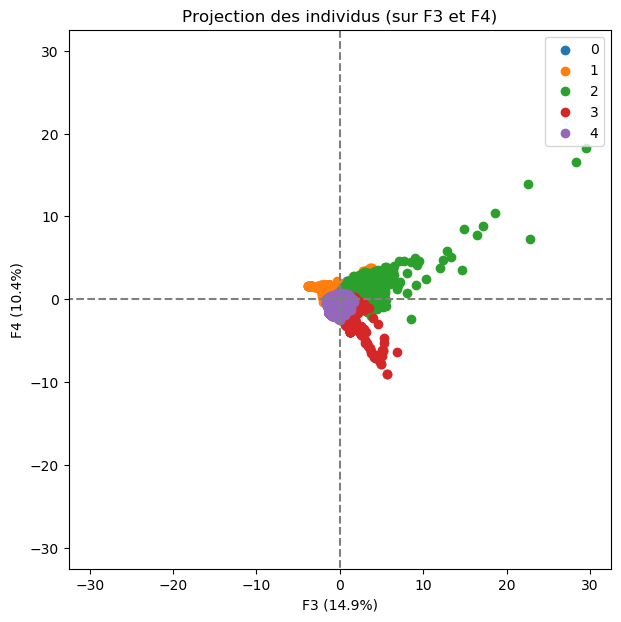

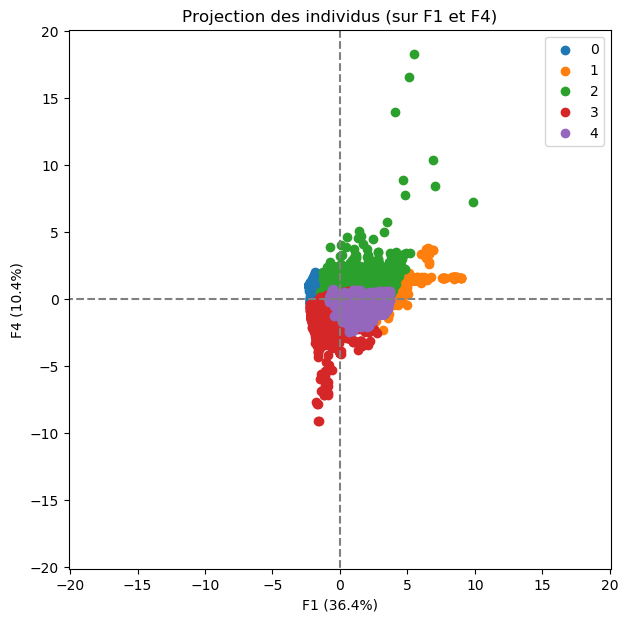

In [19]:
# Projection des individus par clusters
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(2,3),(0,3)],illustrative_var=reduced_food['cluster_labels'], png_filename='img_projection_clusters')

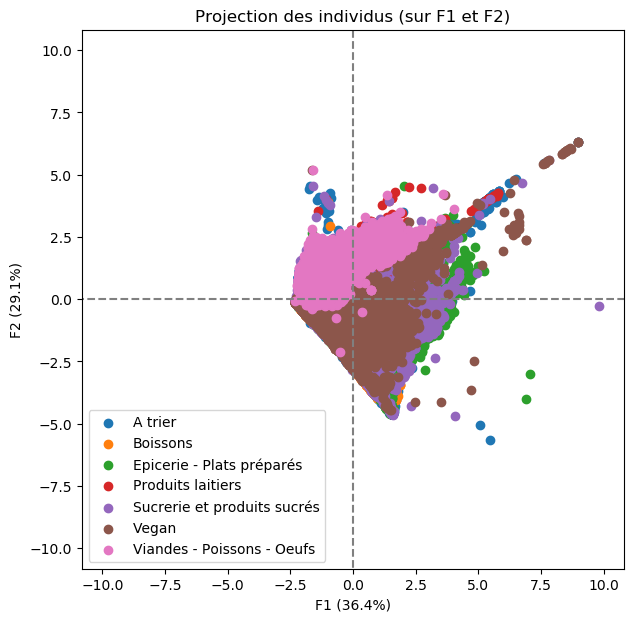

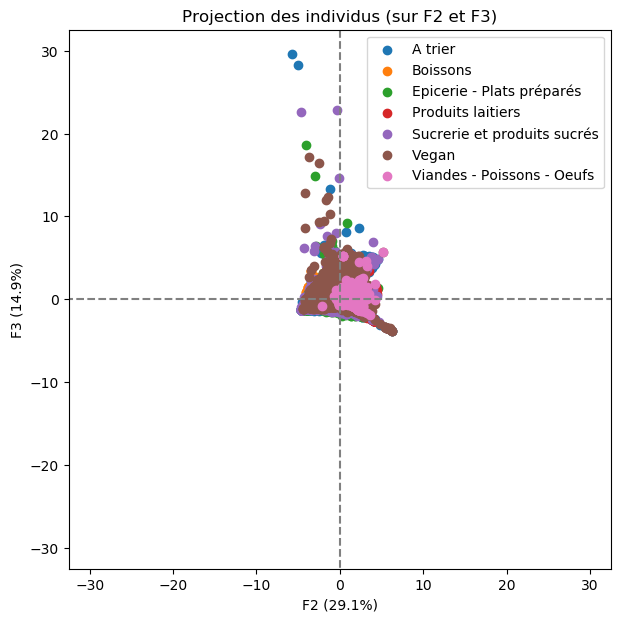

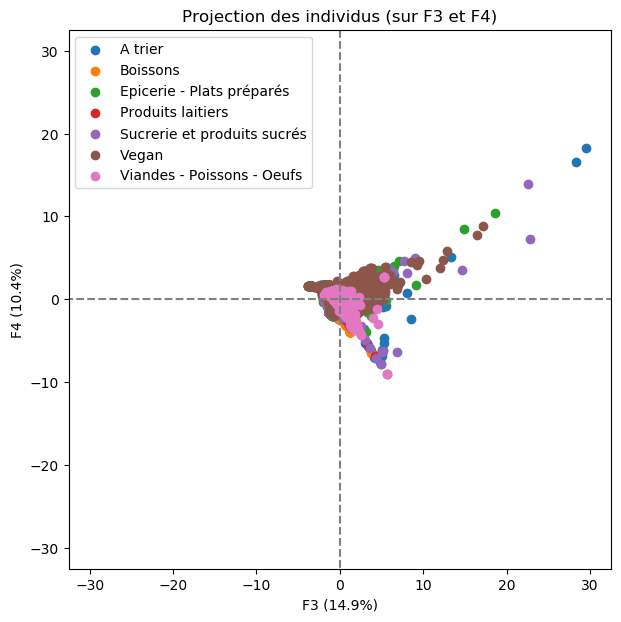

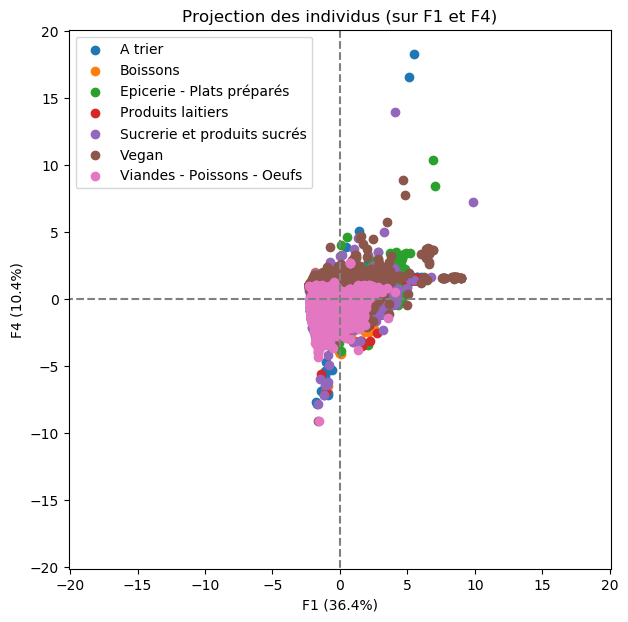

In [20]:
# Projection des individus par catégorie
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(2,3),(0,3)],illustrative_var=reduced_food['category'], png_filename='img_projection_category')

Je note que le cluster 2 est sensiblement du la même position que la catégorie "viandes / oeuf / poissons". L'analyse univariée de la valeur énergétique va me confirmer ou non si le cluster 2 est riche en protéïnes.


La catégorie Vegan englobe sensiblement le reste des clusters. Cette catégorie brouille les possibles comparaisons des autres clusters. Cette catégorie est tout, sauf d'origine animale.

Il doit y avoir une forte communauté vegan dans les utilisateurs finaux d'open food fact.

---
# 4. Analyse univariée sur la valeur énergétique

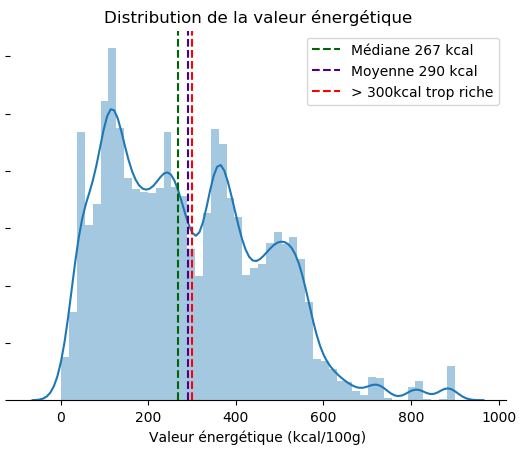

In [21]:
# Observation de la valeur énergétique
fig, ax = plt.subplots()
sns.distplot(reduced_food['energy-kcal_100g'])
sns.despine(left=True)
ax.set(xlabel="Valeur énergétique (kcal/100g)", title='Distribution de la valeur énergétique')
ax.axvline(x=np.median(reduced_food['energy-kcal_100g']), label='Médiane 267 kcal', linestyle='--', color='darkgreen')
ax.axvline(x=np.mean(reduced_food['energy-kcal_100g']), label='Moyenne 290 kcal', linestyle='--', color='indigo')
ax.axvline(x=300, label='> 300kcal trop riche', linestyle='--', color='red')
ax.set_yticklabels([])
ax.legend()
fig.savefig('img_energy_value_hist.png', dpi=500, quality=95, transparent=True)

In [22]:
reduced_food['energy-kcal_100g'].describe()

count    45200.000000
mean       289.676947
std        175.245273
min          1.000000
25%        138.000000
50%        267.000000
75%        410.000000
max        900.000000
Name: energy-kcal_100g, dtype: float64

Je note plusieurs plateaux dans cette distribution.

Un premier de 100kcal à 300kcal qui est le plus représenté, et un second de 300kcal à 550kcal.

Jusqu'à 100 kcal et à partir de 550 kcal, les produits se font plus rares. Ils sont moins important dans le jeu de données. Cela signifie peut-être qu'ils sont moins courant, ou bien que les utlisateurs finaux d'open food fact montre moins d'intérêts pour ces produits.

In [23]:
print(f"{round(reduced_food['energy-kcal_100g'][reduced_food['energy-kcal_100g'] > 300].count() / len(reduced_food)*100,1)} % des produits sont trop riche selon notre nutritionniste")

44.4 % des produits sont trop riche selon notre nutritionniste


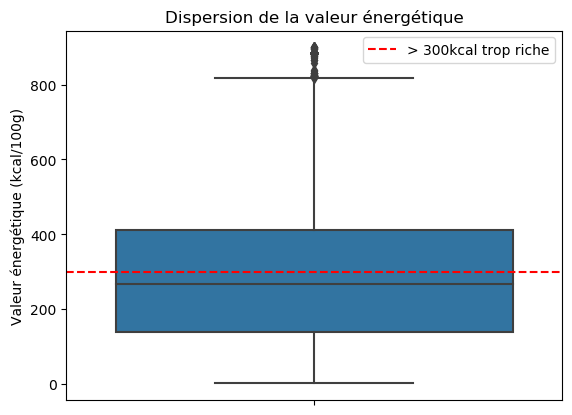

In [24]:
fig, ax = plt.subplots()
sns.boxplot(y=reduced_food['energy-kcal_100g'])
ax.set(ylabel="Valeur énergétique (kcal/100g)", title='Dispersion de la valeur énergétique')
ax.axhline(y=300, label='> 300kcal trop riche', linestyle='--', color='red')
ax.legend()
fig.savefig('img_energy_value_boxplot.png', dpi=500, quality=95, transparent=True)

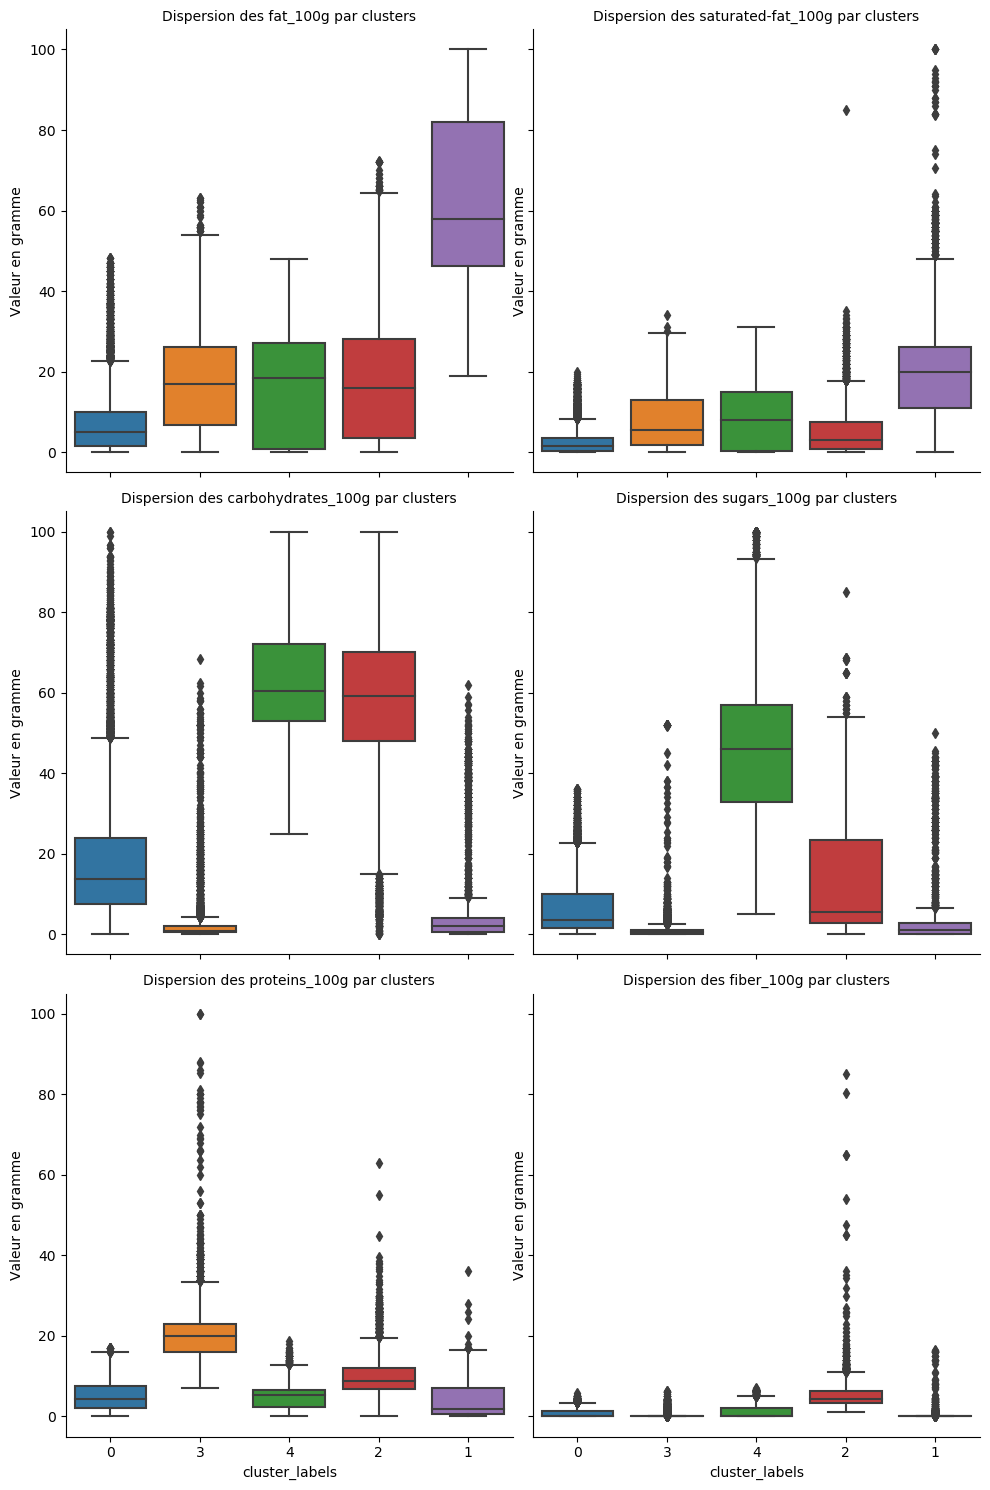

In [25]:
reduced_food_unpivot = pd.melt(reduced_food, id_vars='cluster_labels', value_vars=fact)

order = reduced_food.groupby('cluster_labels').mean().sort_values(by='energy-kcal_100g').index
col_order = ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','fiber_100g']

g = sns.catplot(x='cluster_labels', y='value', data=reduced_food_unpivot, kind='box', col='variable', order=order, col_order=col_order, col_wrap=2)
g.set_titles("Dispersion des {col_name} par clusters")
g.set(ylabel="Valeur en gramme")

g.savefig('img_clusters_kmeans_cat.png', dpi=500, quality=95, transparent=True)

Pour faire suite à ma conclusion sur la comparaison des catégorisation kmeans et manuelle, le cluster 2 est très bien représenté en protéïnes par rapport aux autres catégories.

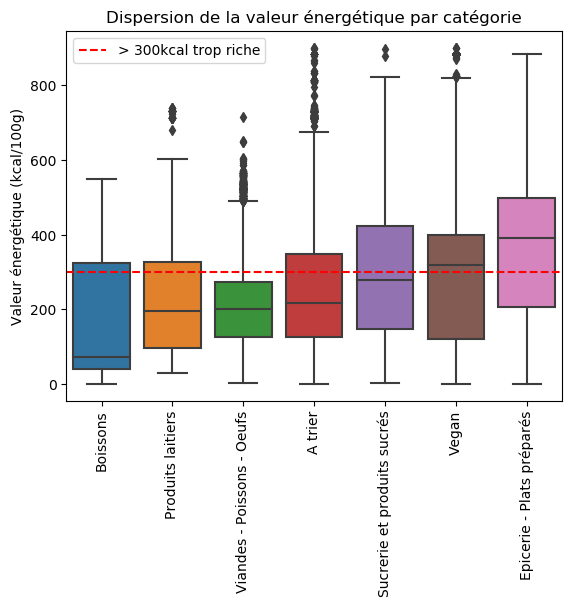

In [26]:
order = reduced_food.groupby('category')['energy-kcal_100g'].median().sort_values().index

fig, ax = plt.subplots()
sns.boxplot(y=reduced_food['energy-kcal_100g'], x=reduced_food['category'], order=order)
ax.set(xlabel='', ylabel="Valeur énergétique (kcal/100g)", title='Dispersion de la valeur énergétique par catégorie')
ax.axhline(y=300, label='> 300kcal trop riche', linestyle='--', color='red')
ax.legend(loc=2)
plt.xticks(rotation=90)
fig.savefig('img_energy_value_cat.png', dpi=500, quality=95, transparent=True, bbox_inches = "tight")

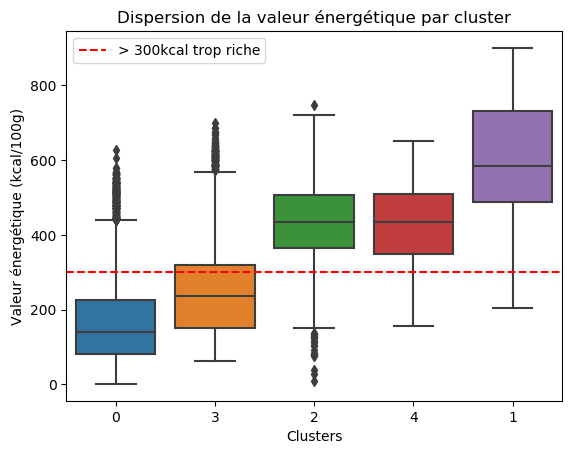

In [27]:
order = reduced_food.groupby('cluster_labels')['energy-kcal_100g'].median().sort_values().index
fig, ax = plt.subplots()
sns.boxplot(y=reduced_food['energy-kcal_100g'], x=reduced_food['cluster_labels'], order=order)
ax.set(xlabel='Clusters', ylabel="Valeur énergétique (kcal/100g)", title='Dispersion de la valeur énergétique par cluster')
ax.axhline(y=300, label='> 300kcal trop riche', linestyle='--', color='red')
ax.legend(loc=2)
fig.savefig('img_clusters_kmeans.png', dpi=500, quality=95, transparent=True)

---
# 4. Preuve scientifique : Test ANOVA

In [28]:
# Extraction des résultats Kmeans pour analyse vers RStudio
reduced_food[['cluster_labels','category','energy-kcal_100g']].to_csv('src/km_food.csv', index=False)